# 20Sept: Pressure Profiles in RGB Star

Create the following plots for a $7M_\odot$ star at the tip of the RGB:
* pressure against r/m
* temperature against r/m
* pressure scale height against r

note: how many pressure scale heights are there in a star? 
* plot lnP against R
* count change in lnP (number of factors of e) -> number of scale heights

## Initialize session, get logistical info

In [1]:
%pylab 
from nugridpy import nugridse as mp
from nugridpy import mesa as ms
from nugridpy import astronomy as ast
import matplotlib.pyplot as plt
import numpy as np
data_dir="/data/nugrid_apod2"    
ms.set_nugrid_path(data_dir)
mp.set_nugrid_path(data_dir)

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


What can NuGridPy do for me? What data is available?  
Check out the docstring for mesa

In [2]:
#help(ms)

The important info: mesa has 2 class objects
* history_data: evolution  
  * history.data or star.log is a time evolution output, printing one line per so many cycles (e.g. each cycle) of all sorts of things
* mesa_profile: individual timestep profile
  * profilennn.data or lognnn.data files are profile data files.  nnn is the number of profile.data or log.data files that is translated into model cycles in the profiles.index file.

Don't necessarily have profiles for all cycle numbers.  
'a1=ms.mesa_profile('.',59070,num_type='model')' should return a profile for a model near 59070

## Initialize Star 

Will use s=ms.star_log to find model/cycle corresponding to RGB; pt=mp.se to look at cycle data.

In [3]:
s=ms.star_log(mass=7,Z=0.02)

nugrid_path = /data/nugrid_apod2
closest set is set1.2 (Z = 0.02)
closest mass is 7.0
Using old star.logsa file ...
 reading ...100% 



What are my available variables?

In [4]:
#s.cols

## Find the RGB
Plot Teff against model number, compare to HRD (as in prev asst).  
Just plotting the 1st 1000 models to zoom in on the interesting bits.

In [5]:
#ifig=1;close(ifig);figure(ifig)
#s.plot('model_number','log_Teff')
#xlim(0,1000)

Tip of RGB: just before T spikes up into horizontal branch. Choose model 550 as representative. 

## RGB Profile: Initialize, Basic Plots
We'll work with pt (from nugridse) since it has the info we need.  
For all the plots, specify fname=550 to isolate rgb.  
FIRST: initialize star data (pt)

In [6]:
pt=mp.se(mass=7,Z=0.02)

nugrid_path = /data/nugrid_apod2
closest set is set1.2 (Z = 0.02)
closest mass is 7.0
Searching files, please wait.......
Reading preprocessor files
File search complete.


### What data is available? 

In [7]:
print(pt.se.dcols)
pt.se.hattrs

['mass', 'radius', 'rho', 'temperature', 'dcoeff', 'iso_massf']


[u'HDF5_version',
 u'SE_version',
 u'numcodev',
 u'codev',
 u'modname',
 u'mini',
 u'zini',
 u'rotini',
 u'overini',
 u'zisnb',
 u'age_unit',
 u'mass_unit',
 u'radius_unit',
 u'rho_unit',
 u'temperature_unit',
 u'dcoeff_unit']

What are the units?

In [8]:
print(pt.get('age_unit'))
print(pt.get('mass_unit'))
print(pt.get('radius_unit'))
print(pt.get('rho_unit'))
print(pt.get('temperature_unit'))
print(pt.get('dcoeff_unit'))

1.0
1.9892e+33
1.0
1.0
1000000000.0
1.0


## Start Basic Plots

<IPython.core.display.Javascript object>


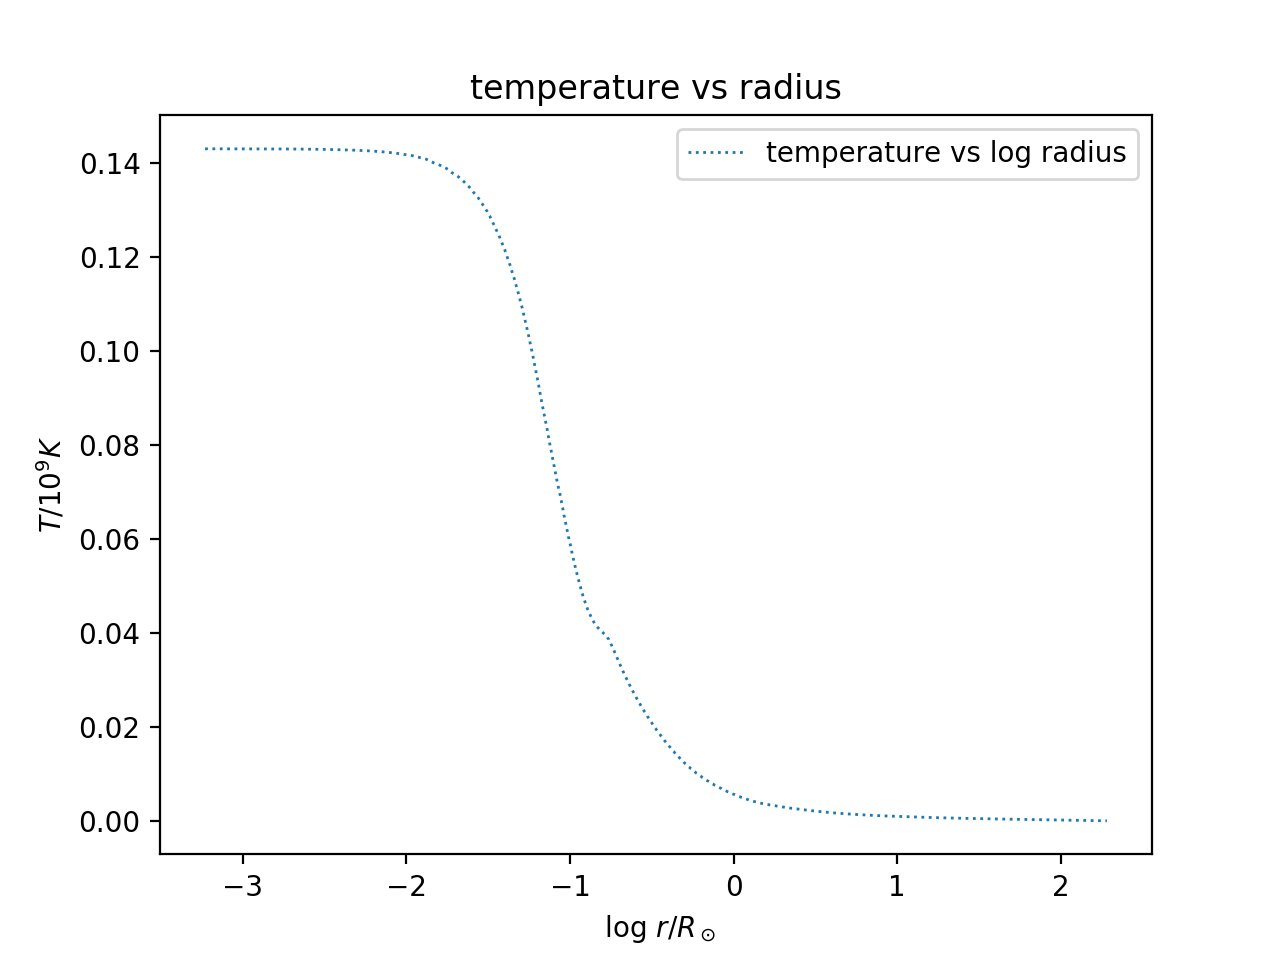

 reading ['radius']...100%0.140027046204


In [14]:
ifig=2;close(ifig);figure(ifig)  
pt.plot('radius', 'temperature', fname=550, shape=':', logx=True, logy=False)
xlabel(' log $r/R_\odot$')
ylabel('$T / 10^9 K$')

<IPython.core.display.Javascript object>


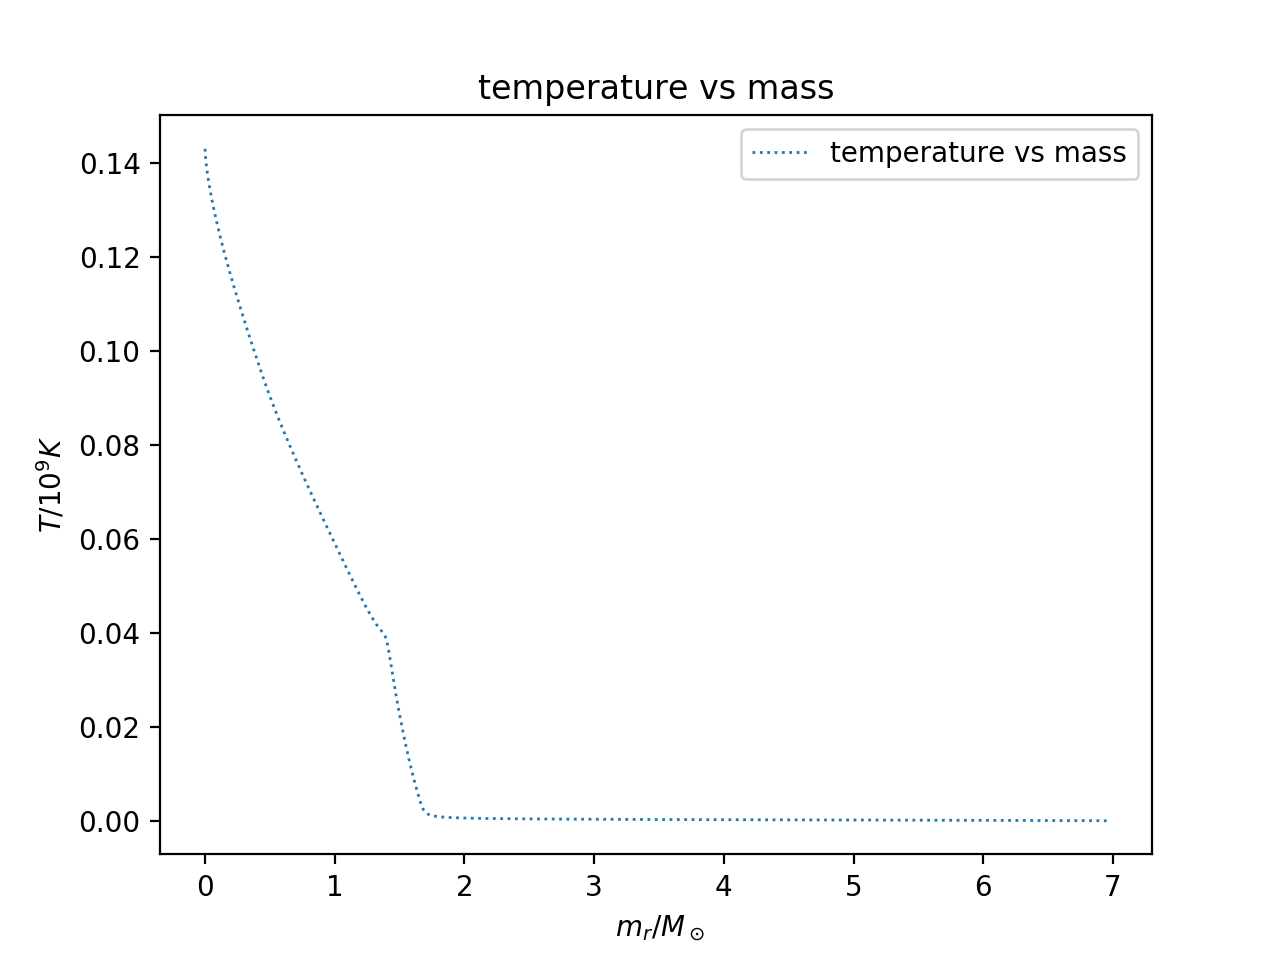

 reading ['mass']...100%0.133026123047


In [15]:
ifig=3;close(ifig);figure(ifig)  
pt.plot('mass','temperature', fname=550, shape=':', logx=False, logy=False)
xlabel(' $m_r/M_\odot$')
ylabel('$T / 10^9 K$')

<IPython.core.display.Javascript object>


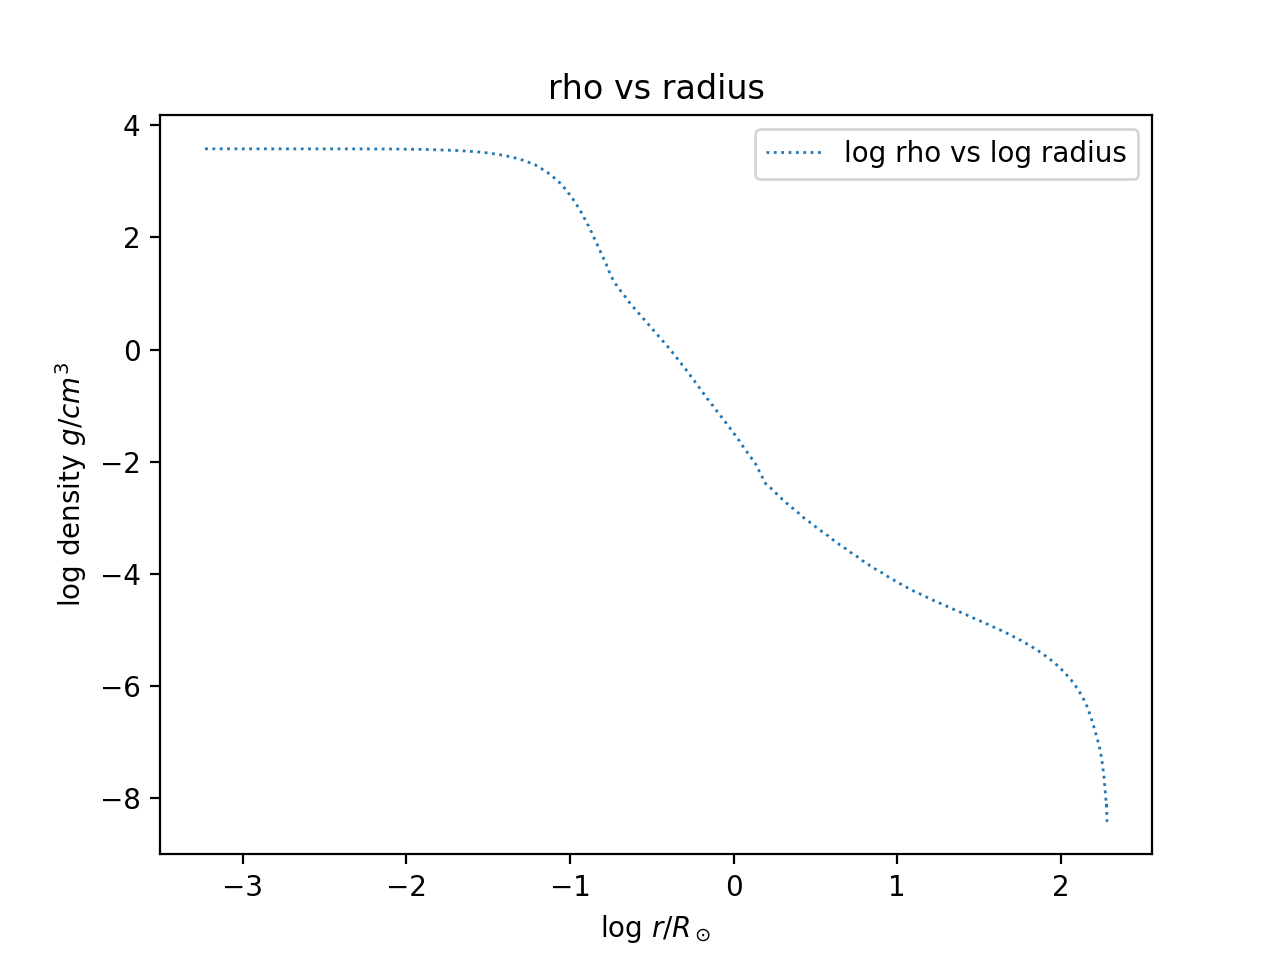

 reading ['radius']...100%0.128093004227


In [20]:
ifig=4;close(ifig);figure(ifig)  
pt.plot('radius','rho', fname=550, shape=':', logx=True, logy=True)
xlabel('log $r/R_\odot$')
ylabel('log density $g/cm^3$')

<IPython.core.display.Javascript object>


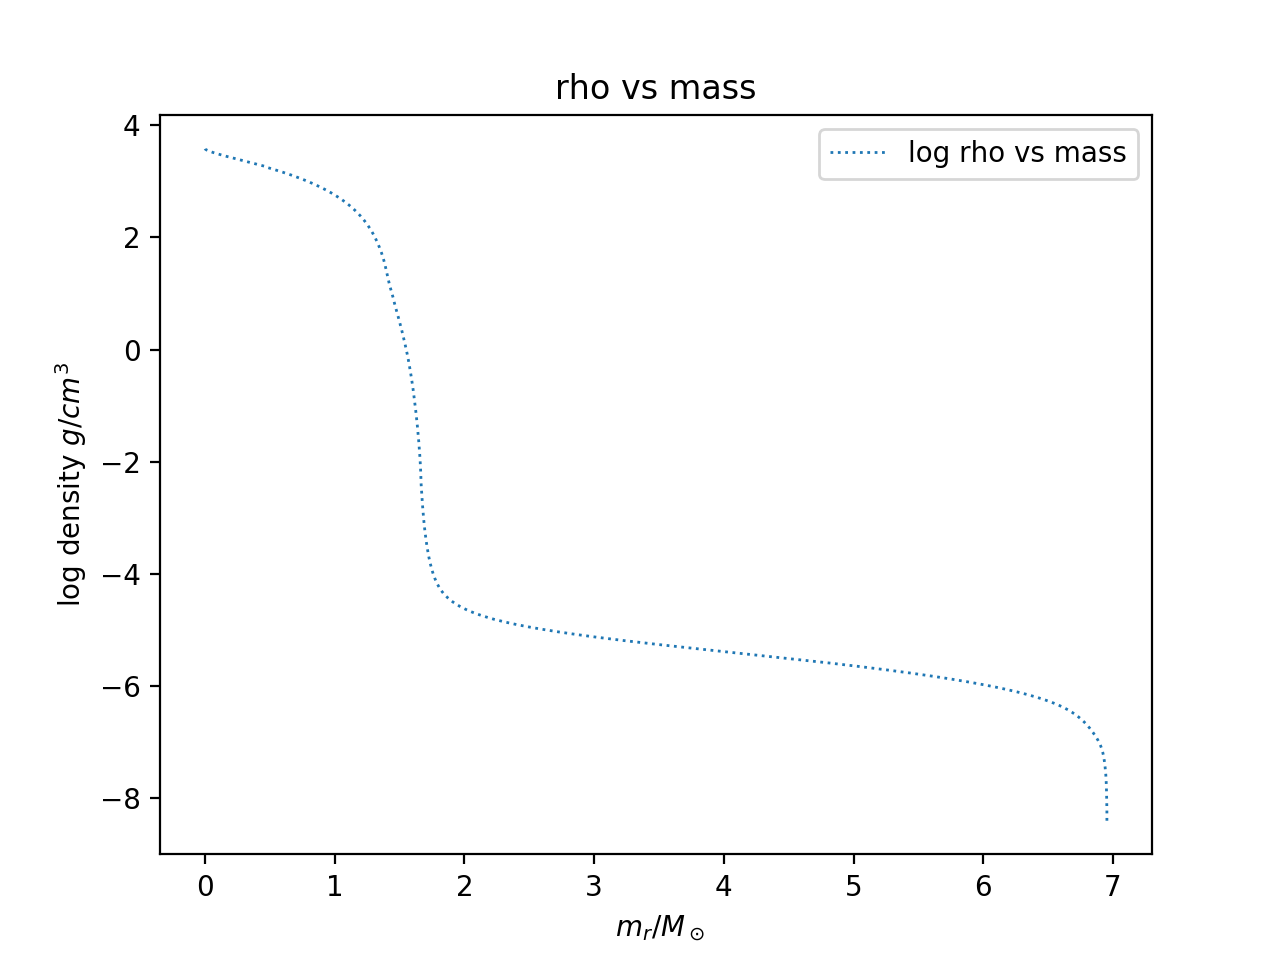

 reading ['mass']...100%0.14556312561


In [18]:
ifig=5;close(ifig);figure(ifig)  
pt.plot('mass','rho', fname=550, shape=':', logx=False, logy=True)
xlabel(' $m_r/M_\odot$')
ylabel('log density $g/cm^3$')

## Pressure Scale Height
Scale height H = RT/gu where R=k/m_p, T=temp, g=g(r), u=mu=mean molec weight  
$g = \frac{GM(<r)}{r^2}$
Then I want to plot H against r

Essentially $H(r)=\alpha \frac{Tr^2}{M}$ where $\alpha = \frac{R}{\mu G} = \frac{k}{\mu m_p G}$

 reading ['mass']...100%0%.100%

<IPython.core.display.Javascript object>


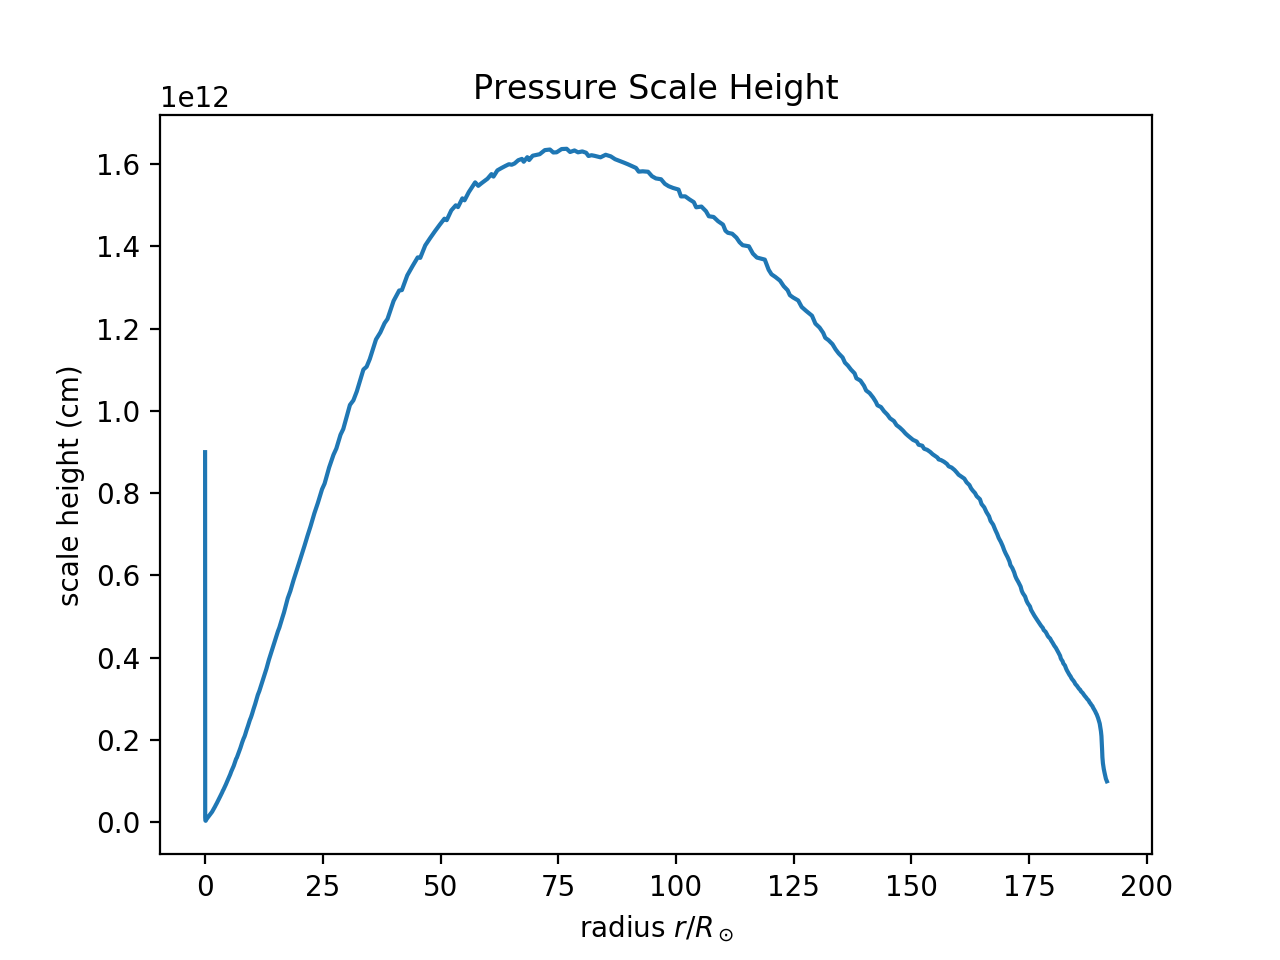

In [25]:
k = ast.boltzmann_constant # erg/K
mu = 0.6                   # estimate; maybe try to calculate from abundances
mH = ast.mass_H_atom       # g (close enough to mp for this purpose)
G = ast.grav_const         # cm^3 g^-1 s^2

alpha = k/(mu*mH*G)       
unit_convert = 10**9 * (ast.rsun_cm)**2 * (ast.msun_g)**-1
a = alpha*unit_convert

T = pt.get(cycle_list='550',dataitem='temperature')
r = pt.get(cycle_list='550',dataitem='radius')
M = pt.get(cycle_list='550',dataitem='mass')

H = np.zeros(len(T))
for i in range(len(H)):
    H[i] = a * T[i] * r[i]**2. * M[i]**-1.
    if H[i]<=0:
        print('H<0 for i='+str(i))

ifig=6;close(ifig);figure(ifig)   
plt.plot(r, H)
plt.title('Pressure Scale Height')
plt.xlabel('radius $r/R_\odot$')
plt.ylabel('scale height (cm)')